<h1>LetsGrowMore (LGMVIPFEB2022) - Data Science Intern</h1>
    
<h3>Author: Sourabh Vijay Dohare <br></h3>
<h3>Task6 : Prediction using Decision Tree  Algorithm :<br>
Level : Intermediate<br>
Language : Python</h3>

<h3>Importing Required Libraries</h3>

In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import export_text
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

<h3>Importing The DataSet</h3>

In [10]:
#Loading Iris Dataset
df = pd.read_csv("IRIS.csv")

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Exploring Data</h3>

In [12]:
# Checking number of rows and columns in the Dataset
print('Number of rows and columns in the Dataset: ',df.shape)


Number of rows and columns in the Dataset:  (150, 6)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
#Checking for Missing Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

<h3>Visualization</h3>

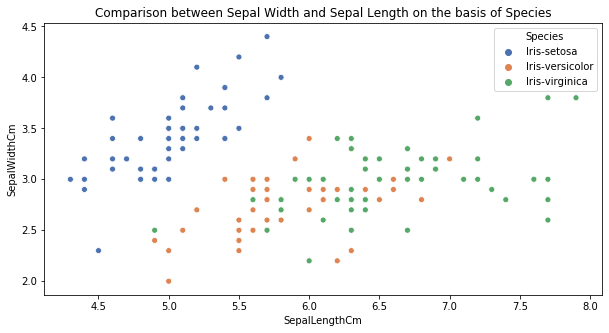

In [17]:
# Sepal Width vs Sepal Length
plt.figure(figsize=(10,5))
plt.title('Comparison between Sepal Width and Sepal Length on the basis of Species')
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'],palette='deep')
plt.show()

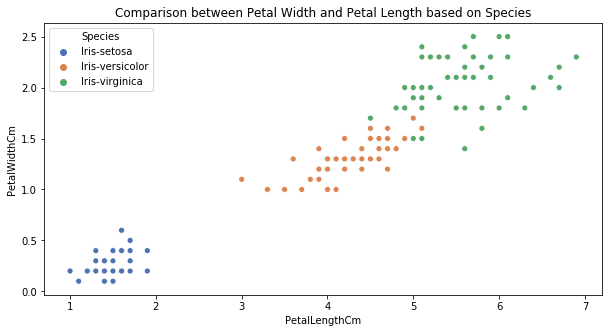

In [18]:
# Petal Width vs Petal Length
plt.figure(figsize=(10,5))
plt.title('Comparison between Petal Width and Petal Length based on Species')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm'],hue=df['Species'],palette='deep')
plt.show()

In [19]:
# Checking correlation
corr = df.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


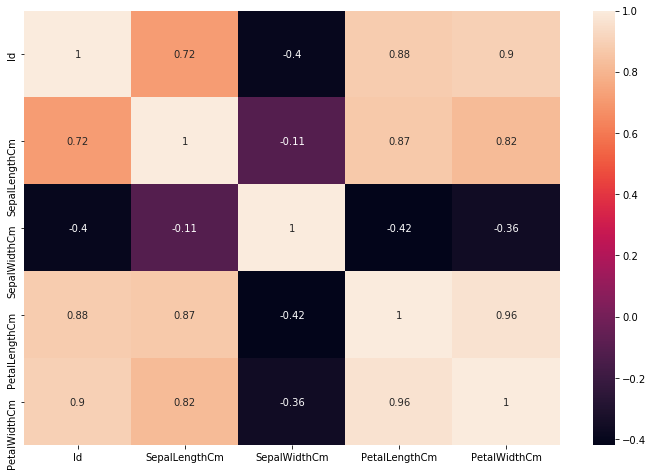

In [20]:
# PLotting Correlation into Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

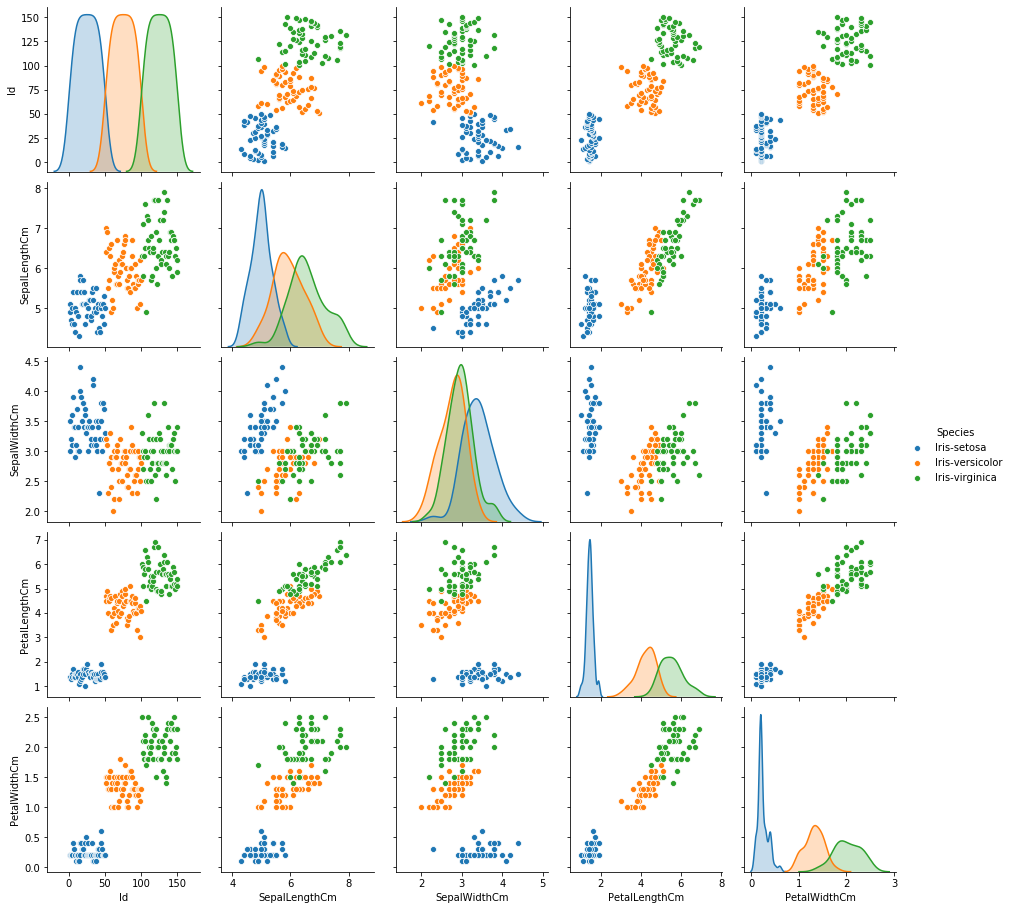

In [21]:
#Pairplot of Species
sns.pairplot(df, hue='Species')
plt.show()

<h3>Building Model</h3>

In [22]:
# Splitting the Data
x = df.drop(['Id','Species'],axis=1) # Independent feature
y = df['Species'] # Dependent feature
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [23]:
#Spliting into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [24]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
# Feature Importance
classifier.feature_importances_

array([0.        , 0.04300928, 0.90006666, 0.05692405])

In [26]:
for feature, index in zip(x, range(4)):
    print(feature,':',classifier.feature_importances_[index])

SepalLengthCm : 0.0
SepalWidthCm : 0.04300928454396505
PetalLengthCm : 0.90006666238314
PetalWidthCm : 0.056924053072894935


In [27]:
y_pred=classifier.predict(x_test)

In [28]:
y_actual=np.array(y_test)

In [29]:
print('Accuracy Score: ',np.round(classifier.score(x_test,y_test)*100,2),'%')

Accuracy Score:  97.78 %


In [30]:
confusion_matrix(y_actual,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [31]:
print(classification_report(y_actual,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



<h3>Visualization of Decision Tree</h3>

In [32]:
text_representation = export_text(classifier)
print(text_representation)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: Iris-virginica



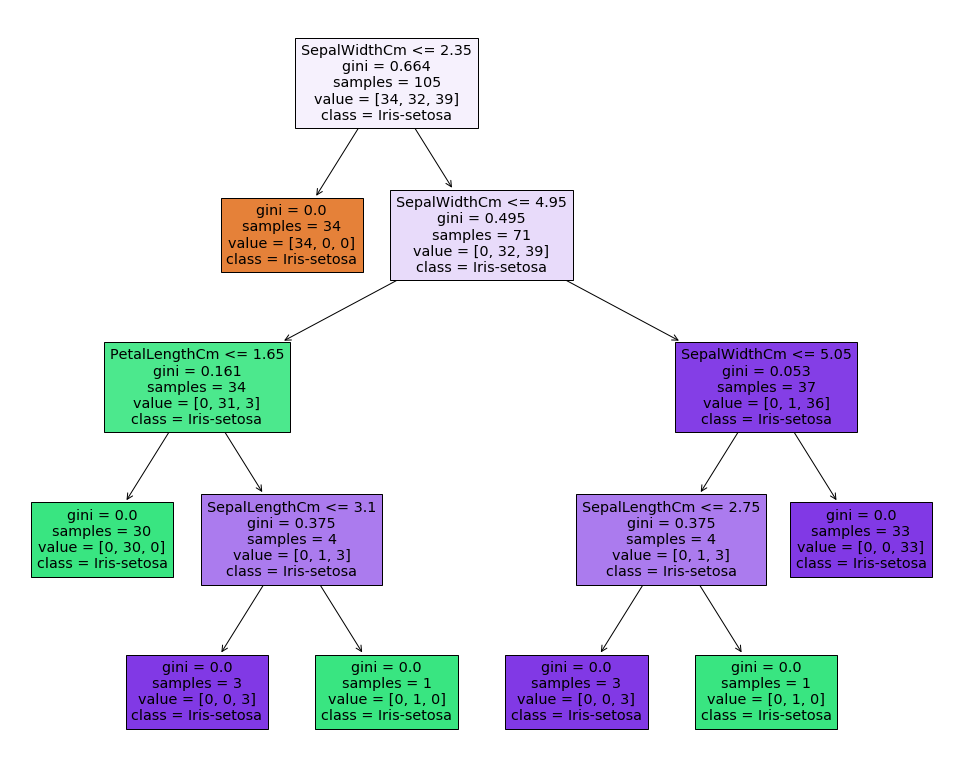

In [34]:
fig = plt.figure(figsize=(17,14))
_ = tree.plot_tree(classifier, 
                   feature_names=df.columns,  
                   class_names=df.Species,
                   filled=True)

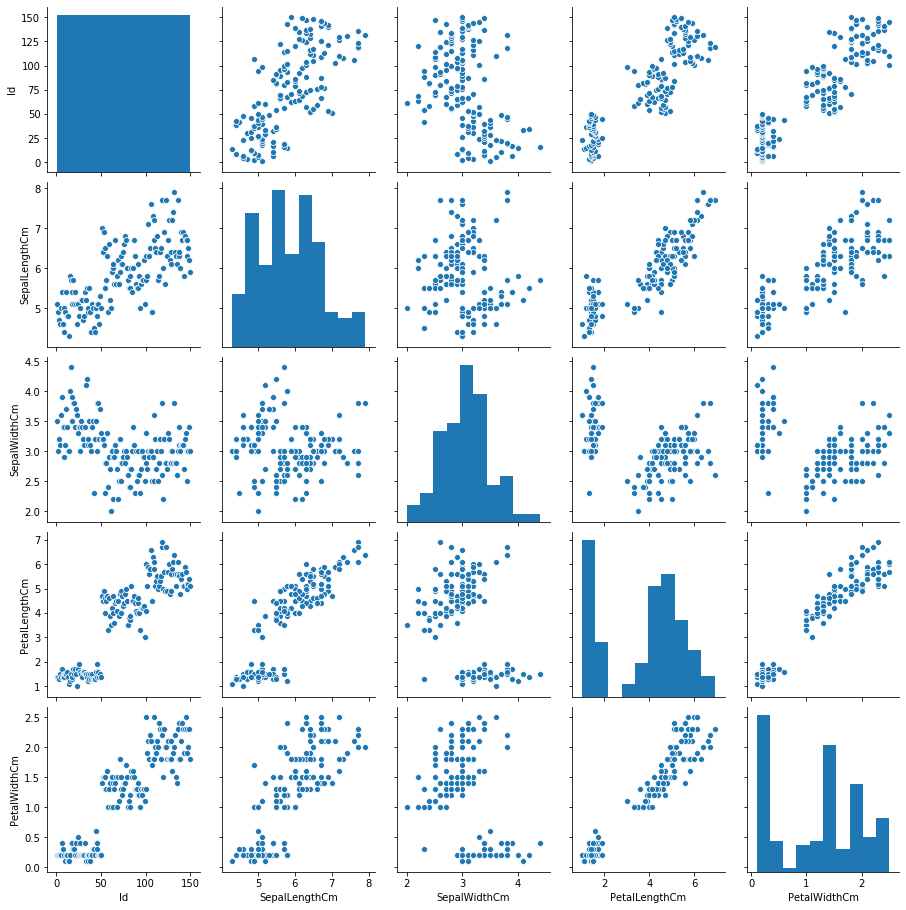

In [35]:
sns.pairplot(df)

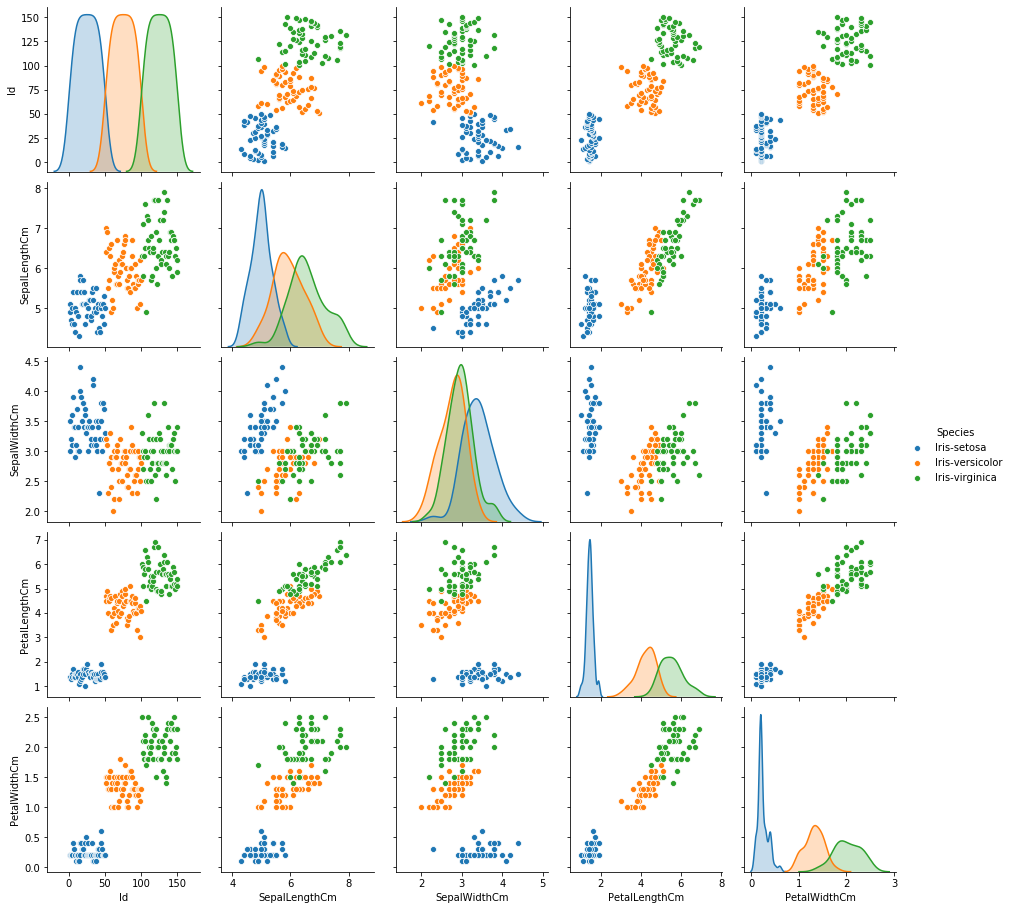

In [36]:
sns.pairplot(df,hue='Species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D728233908>,
      dtype=object)

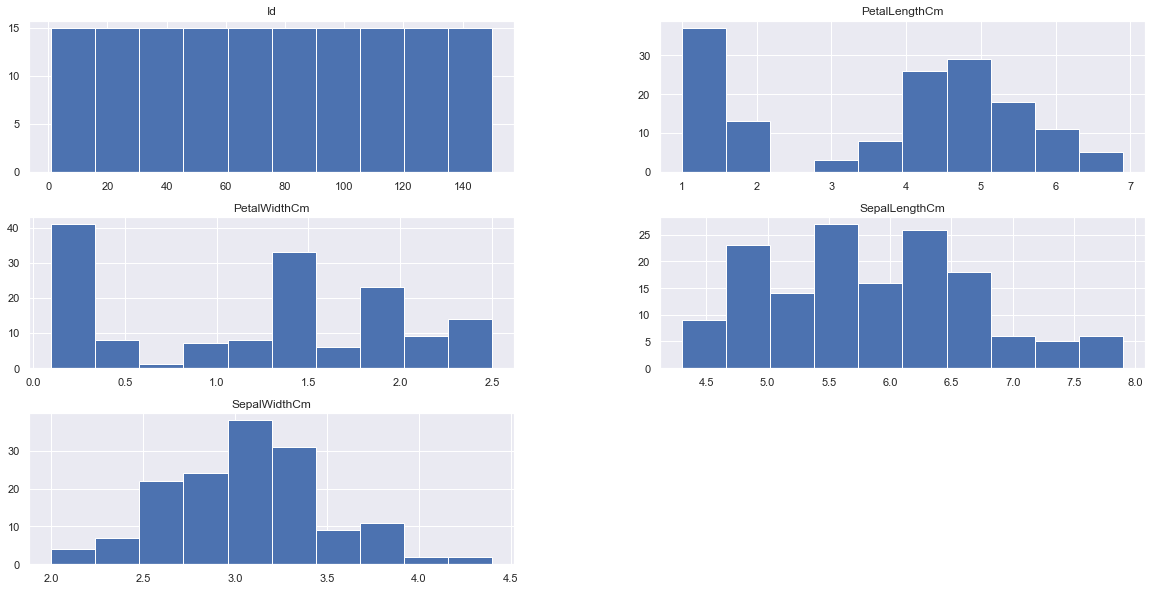

In [38]:
sns.set(rc={'figure.figsize':(20,10)})
df.hist()

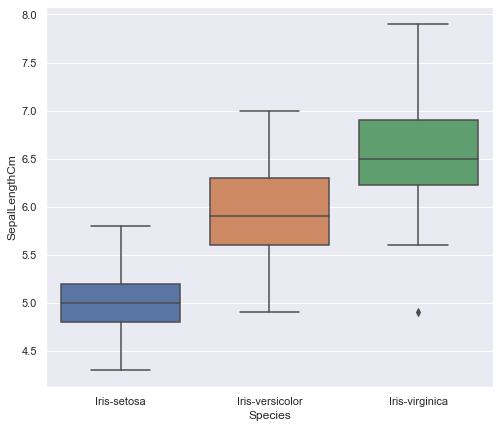

In [39]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalLengthCm',data=df)

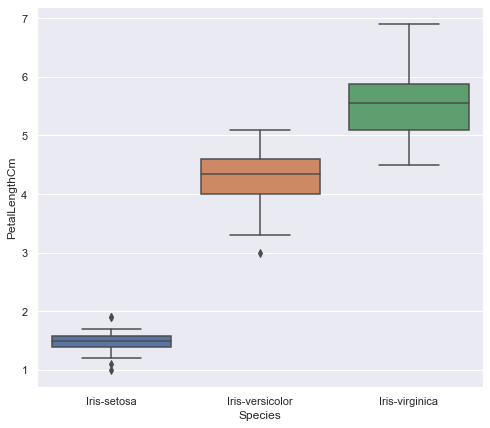

In [40]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalLengthCm',data=df)

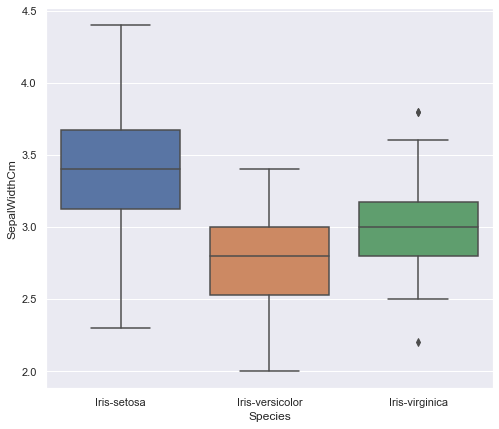

In [41]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalWidthCm',data=df)

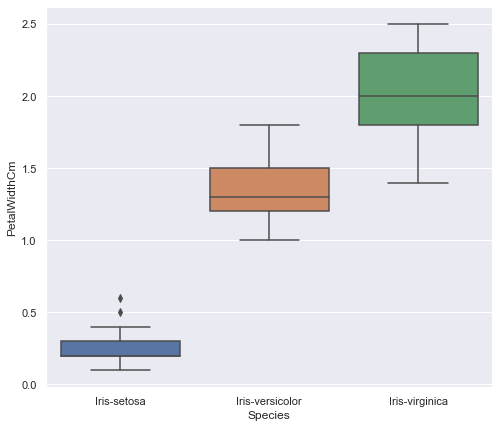

In [42]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalWidthCm',data=df)

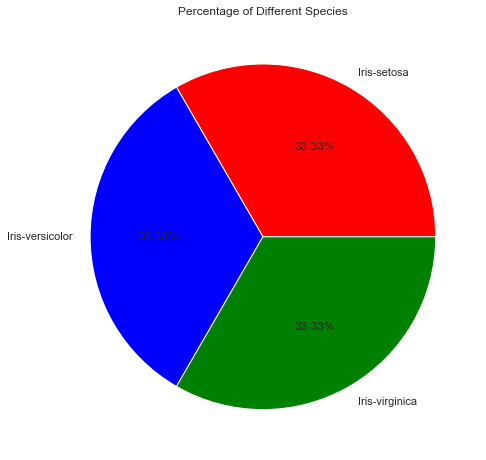

In [44]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
colors = ['red','blue','green']
sp = df['Species'].unique()
vc = df['Species'].value_counts()
ax.pie(vc, labels=sp, autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Different Species')
plt.show()